#Projet Data Science II

Jessica FORNETTI (AMSD)

##Dataset Classic4

On importe le dataset classic4 :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/classic4.csv')
df = df.drop(df.columns[[0]], axis=1)

df

text label
0     Computer-Aided Analysis and Design of Informat...  cacm
1     Milestones in Cataloging In the case of the pr...  cisi
2     childhood psychosis. a description is given of...   med
3     neonatal hepatitis or familial neonatal obstru...   med
4     Handbook of Comparative Librarianship The firs...  cisi
...                                                 ...   ...
7090  throat and nose surgery in patients with const...   med
7091  Computers and Society: A Proposed Course for C...  cacm
7092                 Romberg Integration (Algorithm 60)  cacm
7093  Semantic Evaluation from Left to Right This pa...  cacm
7094       Toward Standards for Handwritten Zero and Oh  cacm

[7095 rows x 2 columns]

On fait le preprocessing : enlever la ponctuation, mettre tout en miniscule, tokenizer, enlever les stopwords et lemmatizer

In [3]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):
    
  # data cleaning
  review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words
  
  # lowercase
  review = review.lower()
  
  # tokenization
  tokens = nltk.word_tokenize(review) # converts review to tokens
  
  # stop_words removal
  review = [word for word in tokens if word not in stop_words] #removing stop words
  
  # lemmatization
  review = [lemmatizer.lemmatize(word) for word in review]
  
  # join words in preprocessed review
  review = ' '.join(review)
  
  return review

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [4]:
df['preprocessing'] = df['text'].apply(lambda review: data_preprocessing(review))
df.head()

text label  \
0  Computer-Aided Analysis and Design of Informat...  cacm   
1  Milestones in Cataloging In the case of the pr...  cisi   
2  childhood psychosis. a description is given of...   med   
3  neonatal hepatitis or familial neonatal obstru...   med   
4  Handbook of Comparative Librarianship The firs...  cisi   

                                       preprocessing  
0  computer aided analysis design information sys...  
1  milestone cataloging case present study dr leh...  
2  childhood psychosis description given diagnost...  
3  neonatal hepatitis familial neonatal obstructi...  
4  handbook comparative librarianship first part ...

On créé la liste sentences contenant une liste de chaque texte sous forme de strings separés et la liste sentences2 sous forme de tuple contenant le label associé

In [5]:
sentences = [line for line in df['preprocessing'].apply(lambda review: str.split(review))]
sentences2 = [(sentences[i], df['label'][i]) for i in range(len(sentences))]

sentences2

[(['computer',
   'aided',
   'analysis',
   'design',
   'information',
   'system',
   'paper',
   'describes',
   'use',
   'computer',
   'aided',
   'analysis',
   'design',
   'development',
   'integrated',
   'financial',
   'management',
   'system',
   'navy',
   'material',
   'command',
   'support',
   'activity',
   'nmcsa',
   'computer',
   'aided',
   'analysis',
   'consists',
   'set',
   'procedure',
   'computer',
   'program',
   'specifically',
   'designed',
   'aid',
   'process',
   'application',
   'software',
   'design',
   'computer',
   'selection',
   'performance',
   'evaluation',
   'four',
   'major',
   'component',
   'problem',
   'statement',
   'language',
   'problem',
   'statement',
   'analyzer',
   'generator',
   'alternative',
   'design',
   'performance',
   'evaluator',
   'statement',
   'requirement',
   'written',
   'ad',
   'accurately',
   'defined',
   'system',
   'analyzed',
   'problem',
   'statement',
   'analyzer',
   'ad

On effectue une représentation textuelle Word2vec :

In [6]:
from gensim.models import Word2Vec

model = Word2Vec(sentences)
print(model)

Word2Vec<vocab=7483, vector_size=100, alpha=0.025>


On obtient un vocabulaire de 7483 mots qu'on store dans la liste words

In [7]:
words = list(model.wv.key_to_index.keys())
words

['system',
 'flow',
 'method',
 'number',
 'information',
 'result',
 'problem',
 'library',
 'algorithm',
 'data',
 'pressure',
 'computer',
 'effect',
 'two',
 'one',
 'time',
 'boundary',
 'program',
 'layer',
 'case',
 'theory',
 'solution',
 'study',
 'use',
 'given',
 '1',
 'analysis',
 'paper',
 'body',
 'used',
 'language',
 'may',
 'equation',
 'also',
 'presented',
 '2',
 'function',
 'wing',
 'technique',
 'made',
 'distribution',
 'value',
 'mach',
 'model',
 'found',
 'described',
 'structure',
 'surface',
 'discussed',
 'present',
 'cell',
 'obtained',
 'type',
 'shock',
 'test',
 'term',
 'large',
 'heat',
 'form',
 'patient',
 'general',
 'condition',
 'new',
 'ratio',
 'research',
 'temperature',
 'speed',
 'point',
 'field',
 'first',
 '3',
 'using',
 'shown',
 'based',
 'high',
 'retrieval',
 'procedure',
 'science',
 'user',
 'development',
 'transfer',
 'experimental',
 'change',
 'process',
 'free',
 'design',
 'application',
 '0',
 'order',
 'set',
 'supersonic',

On utilise sentences2 pour avoir la liste des labels associés aux mots du vocabulaire, pour pouvoir comparer nos clusterings par la suite (en calculant les métrique NMI et ARI)

In [8]:
vocab_labels = []

for word in words:
  for j in range(len(sentences2)):
    if(word in sentences2[j][0]):
      vocab_labels.append(sentences2[j][1])
      break

vocab_labels


['cacm',
 'cran',
 'cisi',
 'cisi',
 'cacm',
 'cran',
 'cacm',
 'cisi',
 'cacm',
 'cisi',
 'cran',
 'cacm',
 'cran',
 'med',
 'med',
 'cisi',
 'cran',
 'cacm',
 'cran',
 'cisi',
 'cran',
 'cran',
 'cisi',
 'cacm',
 'med',
 'med',
 'cacm',
 'cacm',
 'med',
 'cran',
 'cacm',
 'cisi',
 'cran',
 'cisi',
 'med',
 'med',
 'cacm',
 'cran',
 'cran',
 'cran',
 'cran',
 'cran',
 'cran',
 'cran',
 'cran',
 'med',
 'cacm',
 'cran',
 'med',
 'cisi',
 'med',
 'cisi',
 'cisi',
 'cran',
 'cran',
 'med',
 'cisi',
 'cran',
 'cacm',
 'med',
 'cisi',
 'cran',
 'cisi',
 'cran',
 'cisi',
 'cran',
 'cran',
 'cran',
 'cisi',
 'cisi',
 'med',
 'cran',
 'cran',
 'cisi',
 'cran',
 'cisi',
 'cacm',
 'cisi',
 'cisi',
 'cacm',
 'cran',
 'cran',
 'cisi',
 'cacm',
 'cran',
 'cacm',
 'cacm',
 'cran',
 'cacm',
 'cacm',
 'cran',
 'cisi',
 'med',
 'cisi',
 'cran',
 'med',
 'cisi',
 'cran',
 'cran',
 'cisi',
 'cran',
 'cran',
 'cisi',
 'cisi',
 'med',
 'med',
 'cran',
 'med',
 'cisi',
 'cisi',
 'cacm',
 'cisi',
 'cisi',
 

On ne peut pas utiliser la version de la representation GloVe qui est donnée car le fichier est trop lord pour pouvoir être uploadé à Google Collab. En effet on voit un cercle rouge quand on essaie d'uploader le fichier glove.840B.300d.txt et on a l'erreur suivante qui prouve bien qu' il n'a pas pu upload le fichier car le fichier est introuvé ( No such file or directory: '/content/glove.840B.300d.txt')

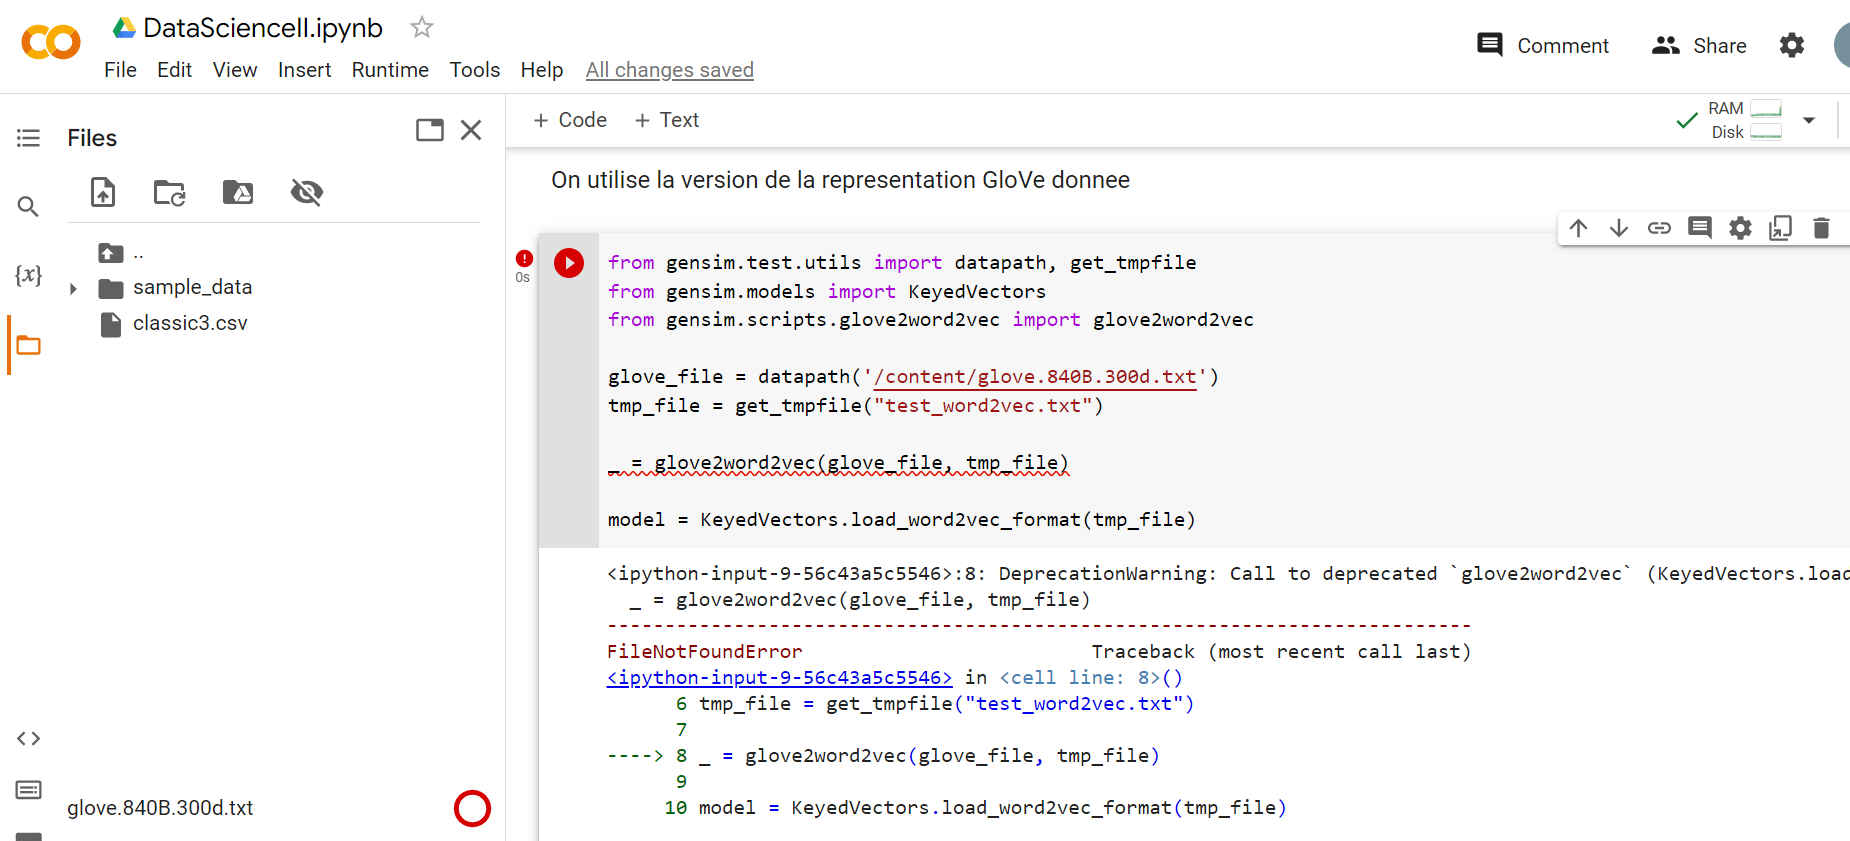

In [ ]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath('/content/glove.840B.300d.txt')
tmp_file = get_tmpfile("test_word2vec.txt")

_ = glove2word2vec(glove_file, tmp_file)

model = KeyedVectors.load_word2vec_format(tmp_file)

<ipython-input-10-56c43a5c5546>:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  _ = glove2word2vec(glove_file, tmp_file)


FileNotFoundError: ignored

###Partie 1 : Approche Tandem

On voit qu'il y a en realité 4 vrai classes d'après la colone label des données

In [9]:
df['label'].unique()

array(['cacm', 'cisi', 'med', 'cran'], dtype=object)

On convertit les labels en entiers pour pouvoir faire les comparaisons par la suite

In [10]:
vocab_labels2 = [0 if elem == 'cacm' else elem for elem in vocab_labels]
vocab_labels2 = [1 if elem == 'cisi' else elem for elem in vocab_labels2]
vocab_labels2 = [2 if elem == 'med' else elem for elem in vocab_labels2]
vocab_labels2 = [3 if elem == 'cran' else elem for elem in vocab_labels2]

#vocab_labels2

On fait le scatter plot dans la dimension d'origine des vrai labels

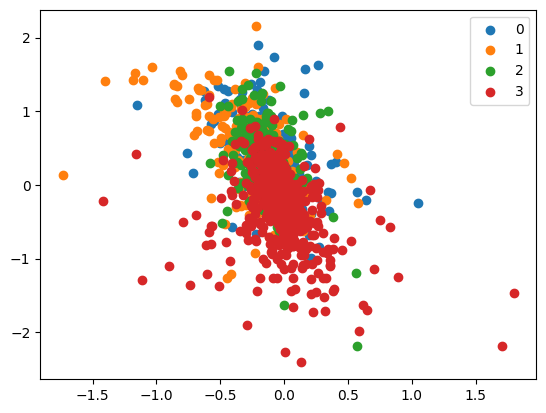

In [11]:
X = model.wv.vectors

label = vocab_labels2

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

####Clustering Kmeans++

#####Espace d'origine

On fait le clustering Kmeans++ dans l'espace d'origine. On garde les paramètres par défault : n_clusters=8 et init='k-means++' car il utilise par défault l'algorithme kmeans++

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


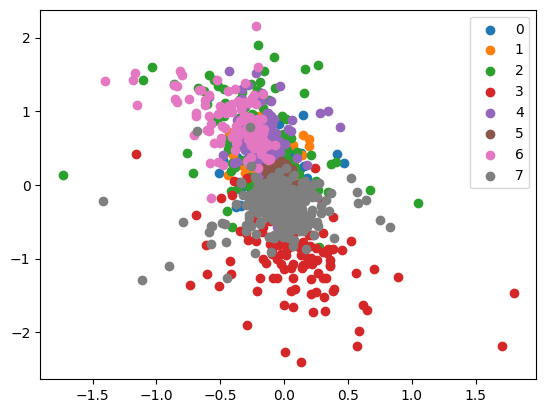

In [12]:
from sklearn.cluster import KMeans

X = model.wv.vectors

kmeans = KMeans()
label = kmeans.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

Il nous trouve par défault beaucoup trop de classes, donc on met n_clusters=4 pour qu'il ait le bon nombre de classes et qu'on puisse évaluer et comparer les clusterings avec les métriques d'accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


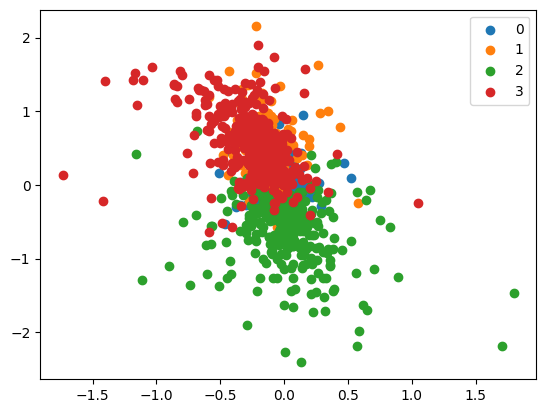

In [13]:
from sklearn.cluster import KMeans

X = model.wv.vectors

kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

On regarde ensuite les métriques d'accuracy NMI et ARI. Le score NMI est un score variant de 0 à 1 qui permet de mesurer l'exactitude de l'assignation des differents clusters. Le score ARI varie de -0.5 à 1. Un score de 1 veut dire un clustering presque parfait (les vrai labels et les labels predits coincident), un score de 0 signifie un clustering randomisé et un score de -0.5 correspond à un clustering pire que randomisé

In [14]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score

nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [15]:
nmi

0.07242602968035897

In [16]:
ari

0.012620005144287773

On obtient un score NMI et ARI très mauvais, en effet on voit bien que les clusters asignés par kmeans++ ne corespondent pas à ceux dans la realité

#####ACP

On fait une ACP avant le clustering

De même si on met n_clusters=4 il trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


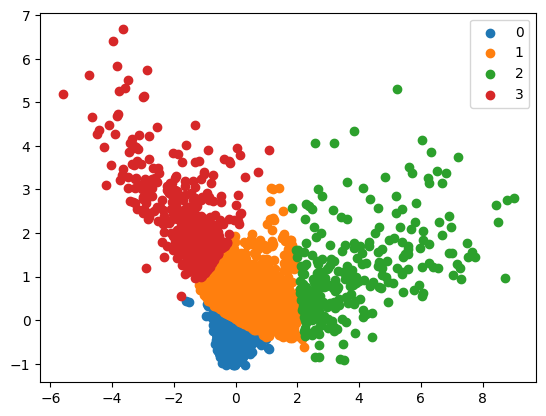

In [17]:
from sklearn.decomposition import PCA

X = model.wv.vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(result)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

On obtient les scores suivants:

In [18]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [19]:
nmi

0.0430995930144553

In [20]:
ari

0.021314012734088665

En regardant la vrai répartition des classes après une ACP, on voit bien que ce clustering nous donne de très mauvais resultats ce qui est confirmé par les métriques NMI et ARI

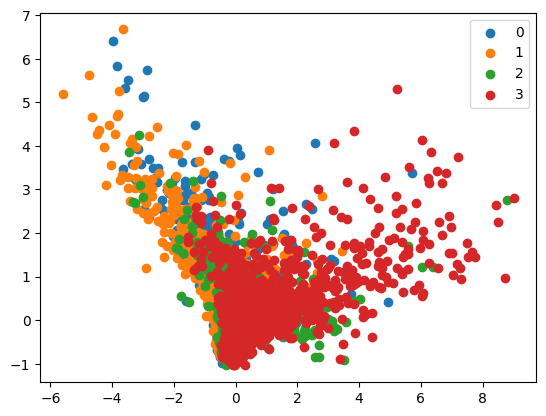

In [21]:
X = model.wv.vectors

label = vocab_labels2
pca = PCA(n_components=2)
result = pca.fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

#####T-SNE

On fait une réduction de dimension t-SNE avant le clustering

De même si on met n_clusters=4 l'algorithme trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


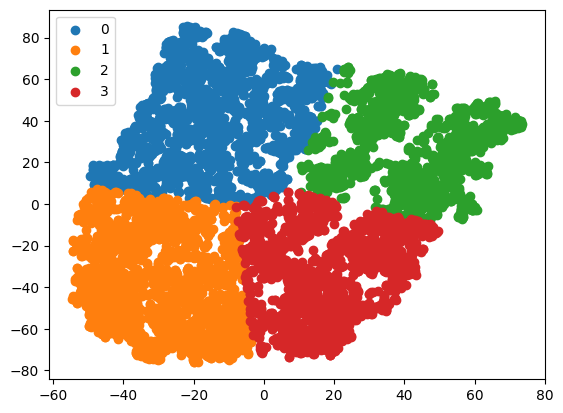

In [22]:
from sklearn.manifold import TSNE

X = model.wv.vectors
X_transforme = TSNE().fit_transform(X)

kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

On regarde les scores NMI et ARI :

In [23]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [24]:
nmi

0.13326197588047806

In [25]:
ari

0.11700075839239112

On obtient de mauvais resultats, ce qui est confirmé en regardant la vrai répartition des classes après une réduction de dimension t-SNE:

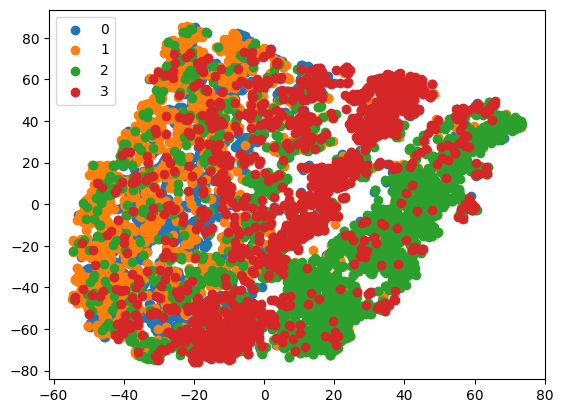

In [26]:
X = model.wv.vectors

label = vocab_labels2
result = TSNE().fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

#####UMAP

On fait une réduction de dimension UMAP avant le clustering

De même si on met n_clusters=4 l'algorithme trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

In [27]:
! pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=38c912aeca4ecaacb167368c20d41e7d96268be931d5b13d6bd2dce106b6ca85
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=1168c5c3f0079b9e1901e3abd50180ffd0852a609dd11a3954e5cdc1a19a3d3a
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


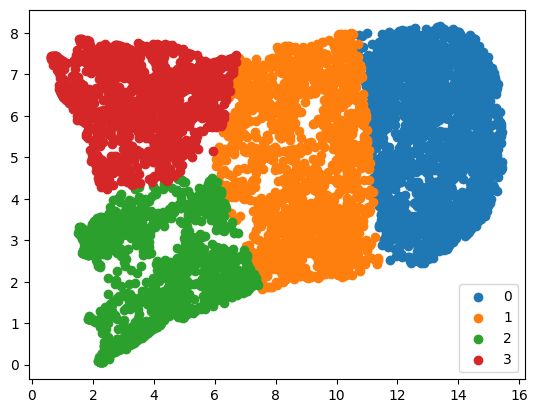

In [28]:
import umap

X = model.wv.vectors
X_transforme = umap.UMAP().fit_transform(X)

kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()


On regarde les metriques NMI et ARI :


In [29]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [30]:
nmi

0.057897827245367926

In [31]:
ari

0.03864951016428297

On obtient d'extremement mauvais score NMI et ARI, cela est bien confirmé en regardant la vrai répartition des classes après une réduction de dimension UMAP car on trouve des classes totalement differentes:

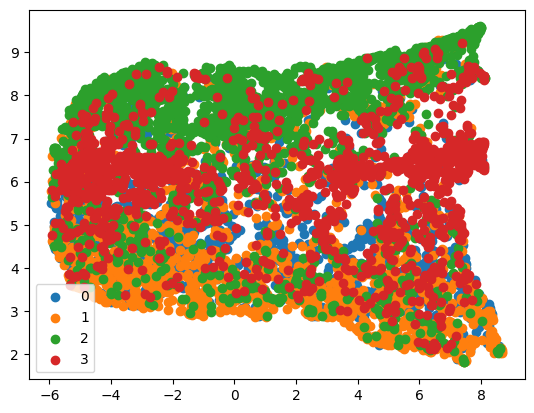

In [32]:
X = model.wv.vectors

label = vocab_labels2
X_transforme = umap.UMAP().fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

####Clustering Kmedoids

In [33]:
! pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.2 MB/s eta 0:00:00


#####Espace d'origine

On fait le clustering Kmedoids dans l'espace d'origine.
Comme l'algorithme ne trouve pas le bon nombre de classes, on met n_clusters=4 pour qu'on puisse évaluer et comparer avec les autres clusterings


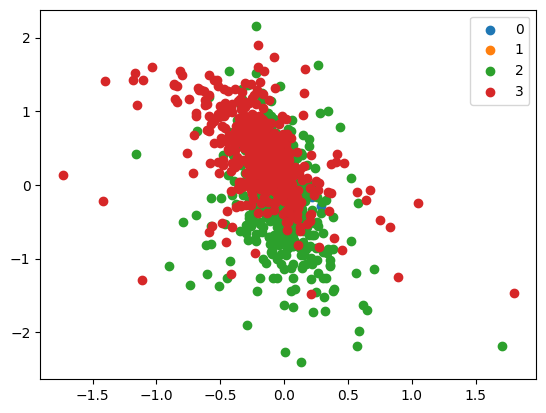

In [34]:
from sklearn_extra.cluster import KMedoids

X = model.wv.vectors

kmedoids = KMedoids(n_clusters=4)
label = kmedoids.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [35]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [36]:
nmi

0.052712122014038666

In [37]:
ari

0.030290955138101837

On obtient des scores extremement mauvais, en effet on voit bien que les clusters asignés par kmediods ne coreespondent pas à ceux dans la realité


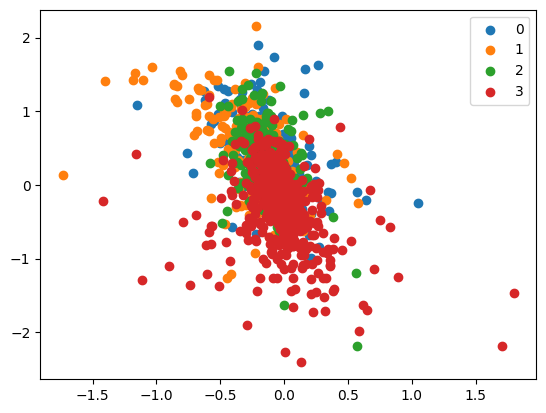

In [38]:
X = model.wv.vectors

label = vocab_labels2

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

#####ACP

On fait une ACP avant le clustering

De même si on met n_clusters=4 il trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

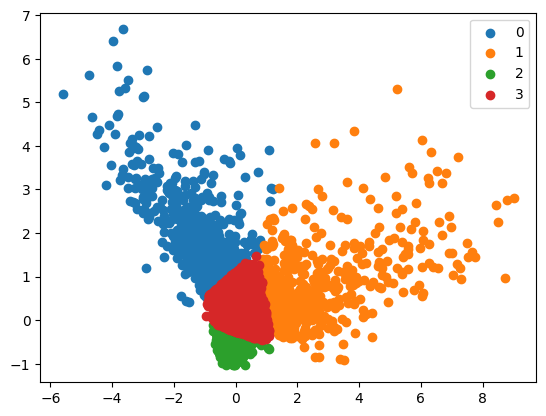

In [39]:
X = model.wv.vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

kmedoids = KMedoids(n_clusters=4)
label = kmedoids.fit_predict(result)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

On obtient les scores suivants:

In [40]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [41]:
nmi

0.051395637652360694

In [42]:
ari

0.027491147840146307

En regardant la vrai répartition des classes après une ACP, on voit bien que ce clustering nous donne de très mauvais resultats ce qui est confirmé par les métriques NMI et ARI


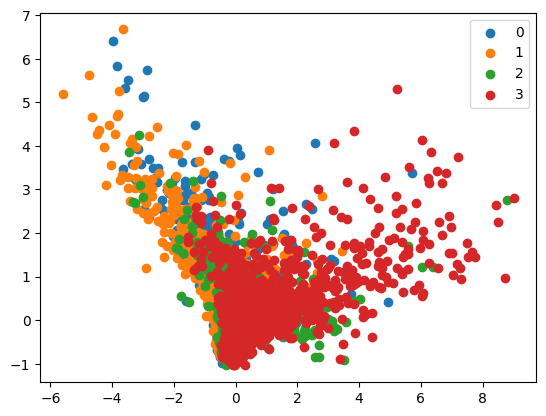

In [43]:
X = model.wv.vectors

label = vocab_labels2
pca = PCA(n_components=2)
result = pca.fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()


#####T-SNE

On fait une réduction de dimension t-SNE avant le clustering

De même si on met n_clusters=4 l'algorithme trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

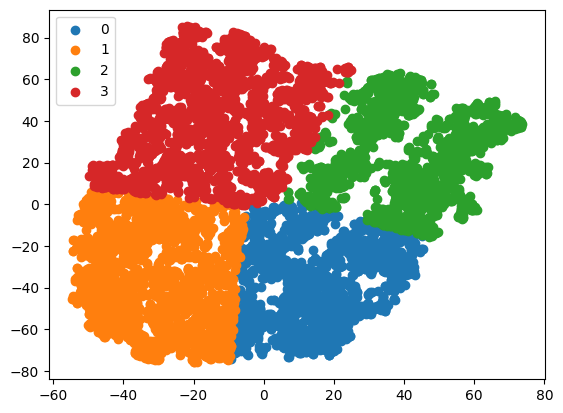

In [44]:
X = model.wv.vectors
X_transforme = TSNE().fit_transform(X)

kmedoids = KMedoids(n_clusters=4)
label = kmedoids.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

On regarde les scores NMI et ARI :

In [45]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [46]:
nmi

0.13360859668871877

In [47]:
ari

0.11475199788378126

On obtient de mauvais resultats, ce qui est confirmé en regardant la vrai répartition des classes après une réduction de dimension t-SNE:


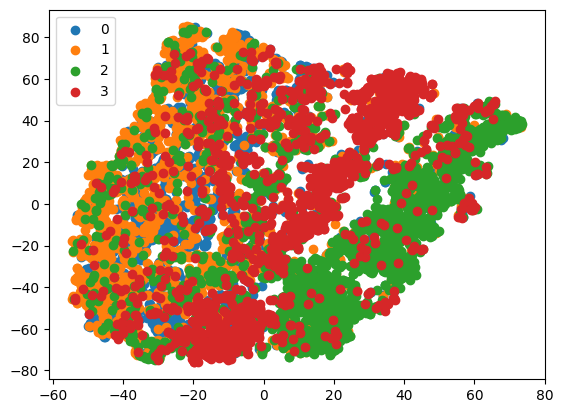

In [48]:
X = model.wv.vectors

label = vocab_labels2
result = TSNE().fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

#####UMAP

On fait une réduction de dimension UMAP avant le clustering

De même si on met n_clusters=4 l'algorithme trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

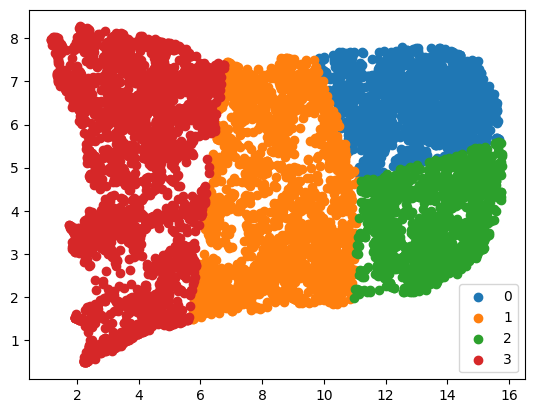

In [49]:
X = model.wv.vectors
X_transforme = umap.UMAP().fit_transform(X)

kmedoids = KMedoids(n_clusters=4)
label = kmedoids.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

On regarde les metriques NMI et ARI :

In [50]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [51]:
nmi

0.07341778069149305

In [52]:
ari

0.053098420492644766

On obtient d'extremement mauvais scores NMI et ARI, cela est bien confirmé en regardant la vrai répartition des classes après une réduction de dimension UMAP car on trouve des classes totalement differentes:


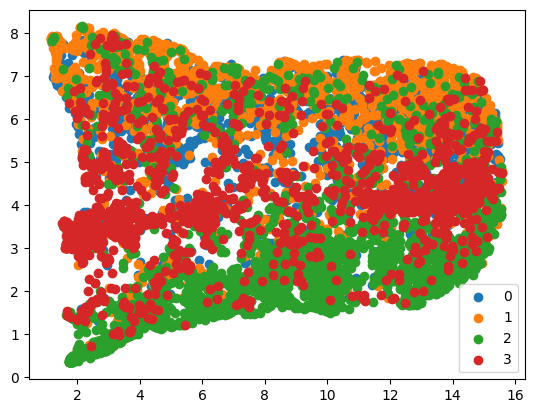

In [53]:
X = model.wv.vectors

label = vocab_labels2
X_transforme = umap.UMAP().fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()



####Spherical Kmeans

In [54]:
! pip install coclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for coclust: filename=coclust-0.2.1-py3-none-any.whl size=29853 sha256=ad4578118d80c0cf4763487c117dcf246b7a546c4b4ac8cea8e7b84bf18fb2c3
  Stored in directory: /root/.cache/pip/wheels/bf/93/3c/e90605656484712ead3e521b0d4d2c9d8cde8125a3ef6dd1df
Successfully built coclust


#####Espace d'origine

On fait le clustering SphericalKmeans dans l'espace d'origine. Comme l'algorithme ne trouve pas le bon nombre de classes, on met n_clusters=4 pour qu'on puisse évaluer et comparer avec les autres clusterings


 == New init == 
iteration: 0
6456.229023233398
iteration: 1
6808.450307936823
iteration: 2
6866.938106783517
iteration: 3
6894.303693944348
iteration: 4
6915.293868003661
iteration: 5
6935.014225264909
iteration: 6
6951.472295430239
iteration: 7
6961.183821678776
iteration: 8
6964.737837109651
iteration: 9
6966.062669625873
iteration: 10
6966.676462958742
iteration: 11
6967.051995387099
iteration: 12
6967.35609992058
iteration: 13
6967.569987249438
iteration: 14
6967.671478739738
iteration: 15
6967.76369127388
iteration: 16
6967.840428006242
iteration: 17
6967.898169296156
iteration: 18
6967.939255375604
iteration: 19
6967.965336865843


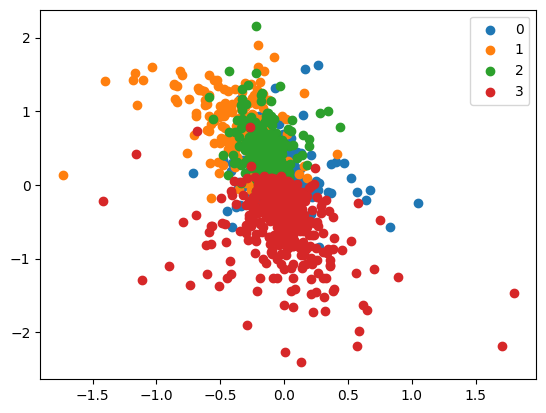

In [55]:
from coclust.clustering import SphericalKmeans

X = model.wv.vectors

skmeans = SphericalKmeans(n_clusters=4)
skmeans.fit(X)
label = skmeans.labels_

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()


In [56]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [57]:
nmi

0.2616311699858035

In [58]:
ari

0.28414478857876463

On obtient des scores plutot mauvais, en effet on voit bien que les clusters asignés par SphericalKmeans ne corespondent pas vraiment à ceux dans la realité

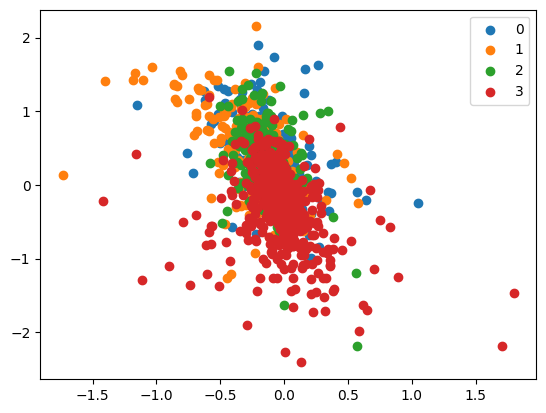

In [59]:
X = model.wv.vectors

label = vocab_labels2

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

#####ACP

On fait une ACP avant le clustering

De même si on met n_clusters=4 il trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

 == New init == 
iteration: 0
2661.093295519728
iteration: 1
5521.766051707288
iteration: 2
6898.775806856282
iteration: 3
7014.618626468804
iteration: 4
7024.288988454651
iteration: 5
7026.730456601321
iteration: 6
7027.997193081615
iteration: 7
7029.217168688529
iteration: 8
7030.396604504706
iteration: 9
7032.048174412996
iteration: 10
7033.500298675697
iteration: 11
7034.562120302149
iteration: 12
7035.3751490395025
iteration: 13
7036.040573428568
iteration: 14
7036.597041746651
iteration: 15
7036.93966562342
iteration: 16
7037.285306372353
iteration: 17
7037.594126261823
iteration: 18
7037.852138605003
iteration: 19
7037.981739813339


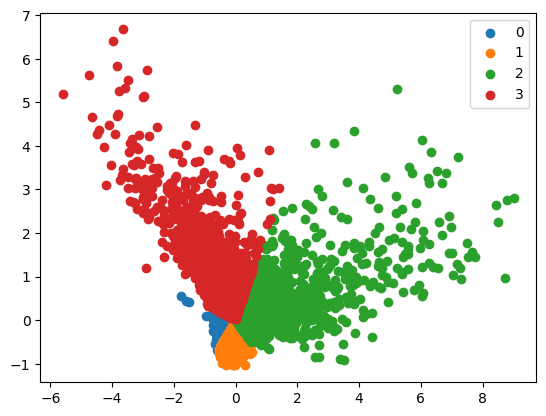

In [60]:
X = model.wv.vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

skmeans = SphericalKmeans(n_clusters=4)
skmeans.fit(result)
label = skmeans.labels_

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

On obtient les metriques suivantes:

In [61]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [62]:
nmi

0.08017457253535788

In [63]:
ari

0.06032509884658244

En regardant la vrai répartition des classes après une ACP, on voit que ce clustering nous donne un très mauvais resultat ce qui est confirmé par les métriques NMI et ARI


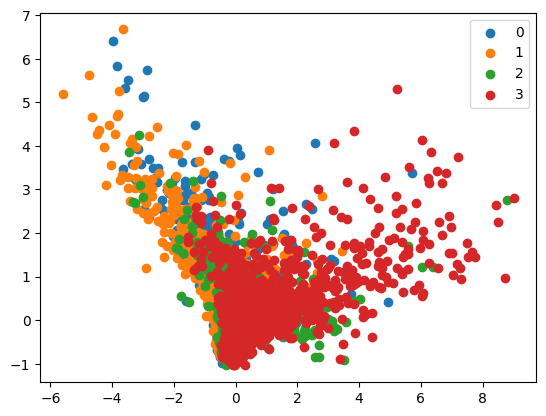

In [64]:
X = model.wv.vectors

label = vocab_labels2
pca = PCA(n_components=2)
result = pca.fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

#####T-SNE

On fait une réduction de dimension t-SNE avant le SphericalKmeans

De même si on met n_clusters=4 l'algorithme trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

 == New init == 
iteration: 0
5223.84652060858
iteration: 1
6416.796055480535
iteration: 2
6583.220229070411
iteration: 3
6636.3575334888665
iteration: 4
6661.62543063954
iteration: 5
6684.014712714325
iteration: 6
6713.448613124127
iteration: 7
6741.4432668512145
iteration: 8
6773.090908704005
iteration: 9
6797.391333157761
iteration: 10
6813.904189127819
iteration: 11
6822.632925932526
iteration: 12
6827.123933146457
iteration: 13
6829.2152141051865
iteration: 14
6830.572642873793
iteration: 15
6831.767240647798
iteration: 16
6832.680412760754
iteration: 17
6833.652151058585
iteration: 18
6834.721632064346
iteration: 19
6836.226857026193


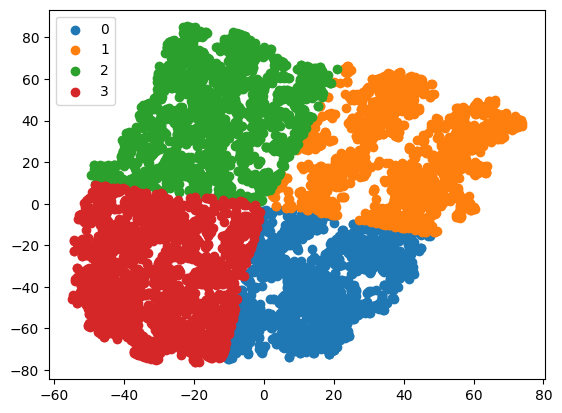

In [65]:
X = model.wv.vectors
X_transforme = TSNE().fit_transform(X)

skmeans = SphericalKmeans(n_clusters=4)
skmeans.fit(X_transforme)
label = skmeans.labels_


u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

On regarde les scores NMI et ARI :

In [66]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [67]:
nmi

0.13363287657404638

In [68]:
ari

0.11447352710581639

On obtient de mauvais resultats, ce qui est confirmé en regardant la vrai répartition des classes après une réduction de dimension t-SNE:


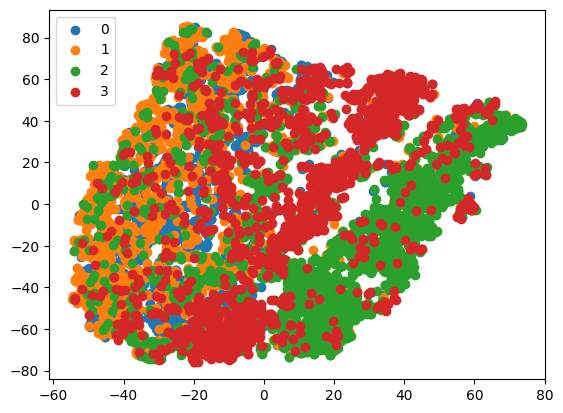

In [69]:
X = model.wv.vectors

label = vocab_labels2
result = TSNE().fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

#####UMAP

On fait une réduction de dimension UMAP avant le clustering

De même si on met n_clusters=4 l'algorithme trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

 == New init == 
iteration: 0
7165.546659160629
iteration: 1
7418.426670100352
iteration: 2
7444.618633048226
iteration: 3
7451.442060481722
iteration: 4
7454.150626969893
iteration: 5
7455.261516316734
iteration: 6
7455.817167553874
iteration: 7
7456.125374278063
iteration: 8
7456.318992332288
iteration: 9
7456.4921387243285
iteration: 10
7456.593519683599
iteration: 11
7456.651392303529
iteration: 12
7456.69202967788
iteration: 13
7456.741322635754
iteration: 14
7456.789948103717
iteration: 15
7456.8293505128395
iteration: 16
7456.85624314409
iteration: 17
7456.886188214672
iteration: 18
7456.9258661543345
iteration: 19
7456.970650410862


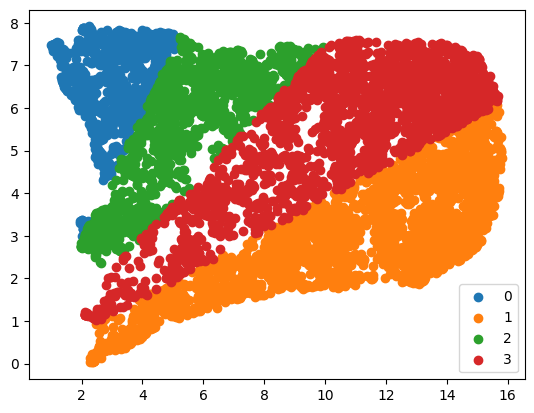

In [70]:
X = model.wv.vectors
X_transforme = umap.UMAP().fit_transform(X)

skmeans = SphericalKmeans(n_clusters=4)
skmeans.fit(X_transforme)
label = skmeans.labels_

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

On regarde les metriques NMI et ARI :

In [71]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [72]:
nmi

0.1160798580543923

In [73]:
ari

0.14387428887155393

On obtient de mauvais scores NMI et ARI, cela est bien confirmé en regardant la vrai répartition des classes après une réduction de dimension UMAP car on trouve des classes totalement differentes:


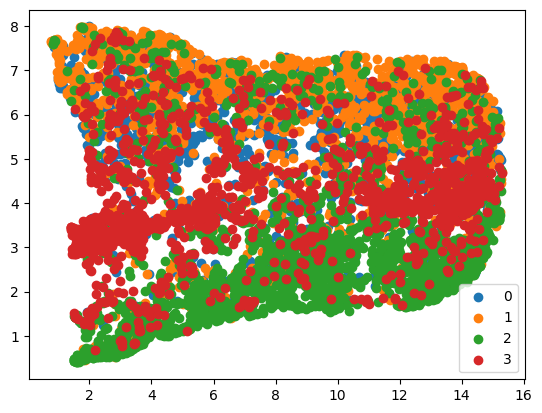

In [74]:
X = model.wv.vectors

label = vocab_labels2
X_transforme = umap.UMAP().fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

####Clustering Hierarchique

#####Espace d'origine

On fait le clustering hierarchique dans l'espace d'origine. Comme l'algorithme ne trouve pas le bon nombre de classes, on met n_clusters=4 pour qu'on puisse évaluer et comparer avec les autres clusterings


Pour choisir le meilleur critère d'agrégation (single, complete, ward ou average), on regarde la forme et la distribution des vraies classes

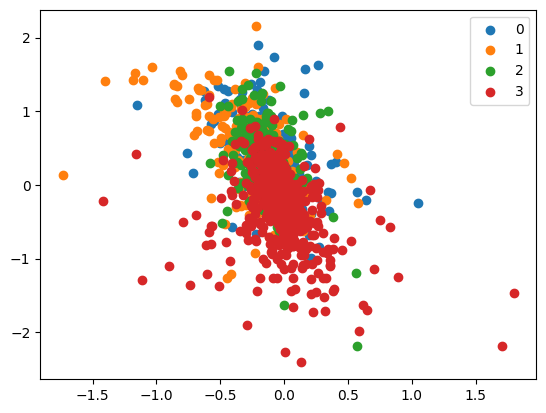

In [75]:
X = model.wv.vectors

label = vocab_labels2

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

Si on utilise single comme critère d'aggrégation, comme les points on une forme allongé, il aura du mal à retrouver les clusters (à cause de l'effet de chaine)

Si on utilise complete il poura bien integrer les points outliers mais ne produira pas forcément de bons clusters

Si on utilise le critère de Ward on aura des clusters d'allure spherique ce qui peut marcher dans notre cas

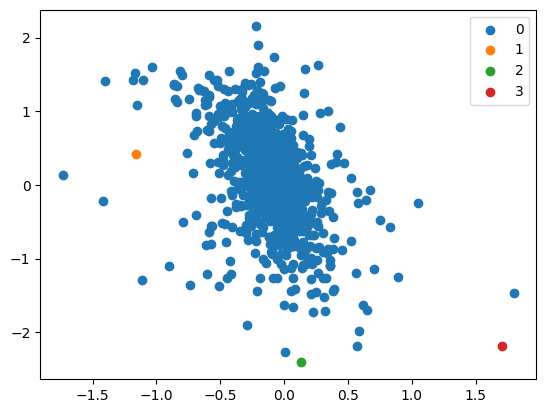

In [76]:
from sklearn.cluster import AgglomerativeClustering

X = model.wv.vectors

clust_hierarchique = AgglomerativeClustering(n_clusters=4, linkage='single')
label = clust_hierarchique.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

En effet on voit qu'avec single il regroupe la majorité des points en un clusters à cause de la forme allongé des points

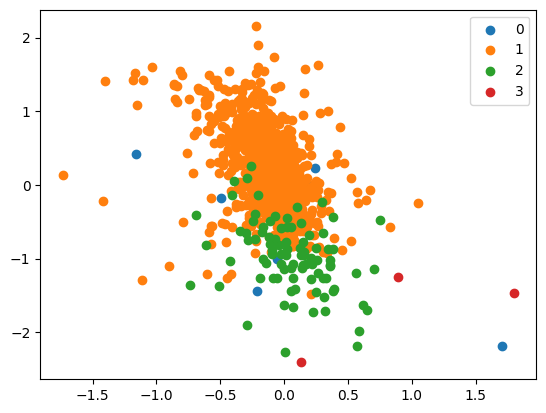

In [77]:
from sklearn.cluster import AgglomerativeClustering

X = model.wv.vectors

clust_hierarchique = AgglomerativeClustering(n_clusters=4, linkage='complete')
label = clust_hierarchique.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

Avec complete il ne trouve pas non plus les bon clusters : il regroupe les points en trois grands clusters

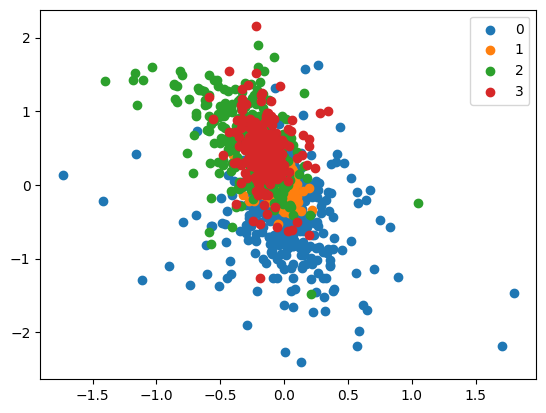

In [78]:
from sklearn.cluster import AgglomerativeClustering

X = model.wv.vectors

clust_hierarchique = AgglomerativeClustering(n_clusters=4, linkage='ward')
label = clust_hierarchique.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [79]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [80]:
nmi

0.07337106222502132

In [81]:
ari

0.02093507034261953

Le critère de ward nous donne le meilleur clustering, même si les metriques NMI et ARI restent très mauvaises       

#####ACP

On fait une ACP avant le clustering

De même si on met n_clusters=4 l'algorithme trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

On regarde la forme des vrais clusters (après l'ACP) pour choisir le critère d'aggregation

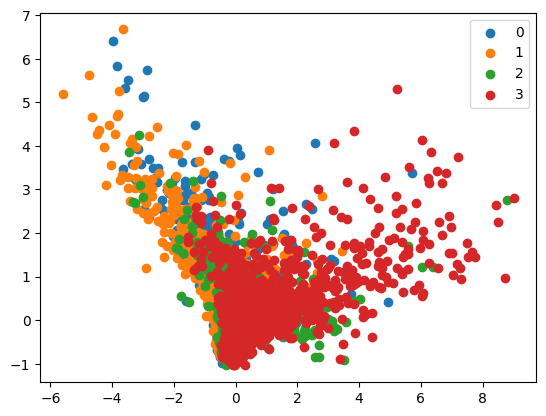

In [82]:
X = model.wv.vectors

label = vocab_labels2
pca = PCA(n_components=2)
result = pca.fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

Comme précédement, le critere single ne produira pas un bon clustering car les points sont regroupés de facon allongé

Le critere de ward aura aussi probablement du mal car les clusters se chevauchent et n'ont pas trop une forme spherique

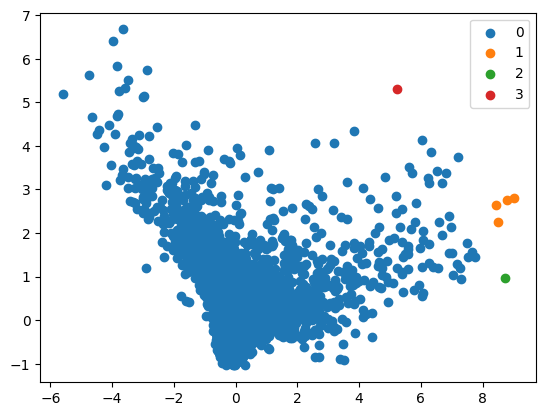

In [83]:
X = model.wv.vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

clust_hierarchique = AgglomerativeClustering(n_clusters=4, linkage='single')
label = clust_hierarchique.fit_predict(result)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

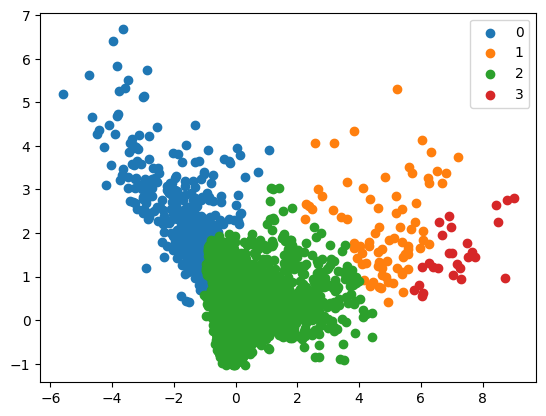

In [84]:
X = model.wv.vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

clust_hierarchique = AgglomerativeClustering(n_clusters=4, linkage='complete')
label = clust_hierarchique.fit_predict(result)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

In [85]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [86]:
nmi

0.042254398408526454

In [87]:
ari

0.009374784898281963

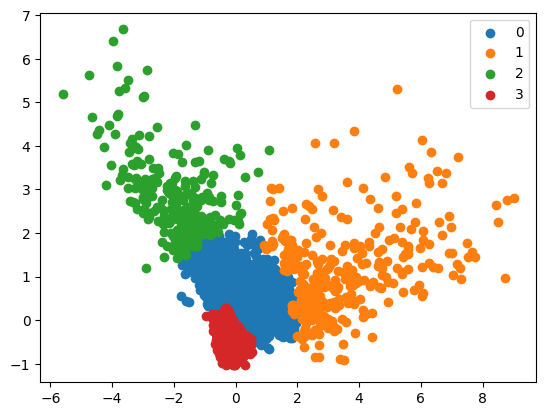

In [88]:
X = model.wv.vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

clust_hierarchique = AgglomerativeClustering(n_clusters=4, linkage='ward')
label = clust_hierarchique.fit_predict(result)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

In [89]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [90]:
nmi

0.03946826899264807

In [91]:
ari

0.0191574626981452

On obtient des métriques pas très élevées, mais le clustering marche le mieux avec le critère complete

#####T-SNE

On fait une reduction de dimension de type t-SNE avant le clustering hierarchique

De même si on met n_clusters=4 l'algorithme trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

On regarde par ailleurs la forme des vrais clusters pour choisir le critere d'aggregation


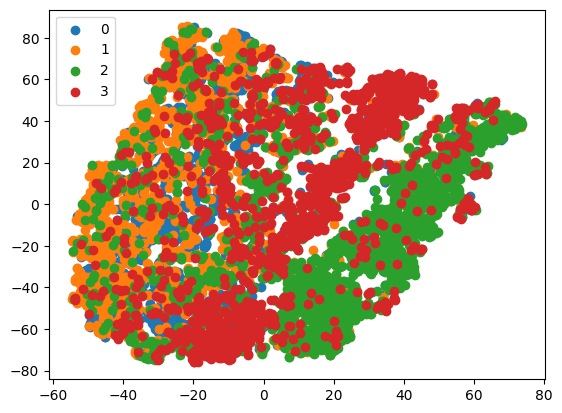

In [92]:
X = model.wv.vectors

label = vocab_labels2
X_transforme = TSNE().fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()


Comme précédement, le critere single et complete ne trouveront probablement pas les bon clusters, mais comme on a une forme spherique (et que les clusters se chevauchent beaucoup), même le critère de ward risque de ne pas trouver les bon clusters



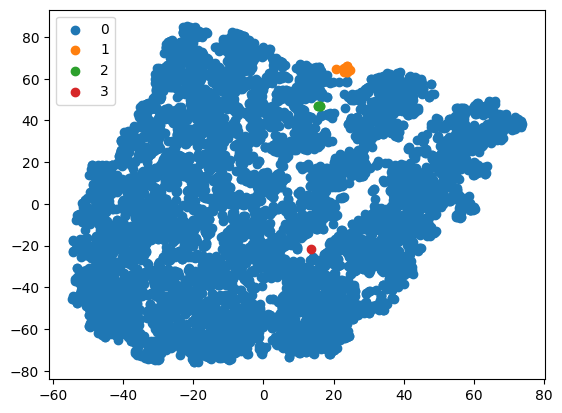

In [93]:
X = model.wv.vectors
X_transforme = TSNE().fit_transform(X)

clust_hierarchique = AgglomerativeClustering(n_clusters=4, linkage='single')
label = clust_hierarchique.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

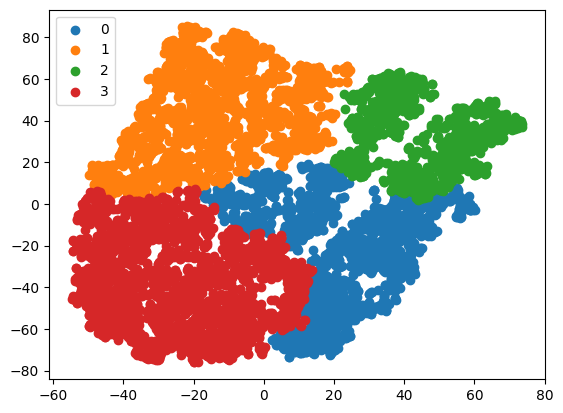

In [94]:
X = model.wv.vectors
X_transforme = TSNE().fit_transform(X)

clust_hierarchique = AgglomerativeClustering(n_clusters=4, linkage='complete')
label = clust_hierarchique.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

In [95]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [96]:
nmi

0.11683873237114092

In [97]:
ari

0.09908675943774767

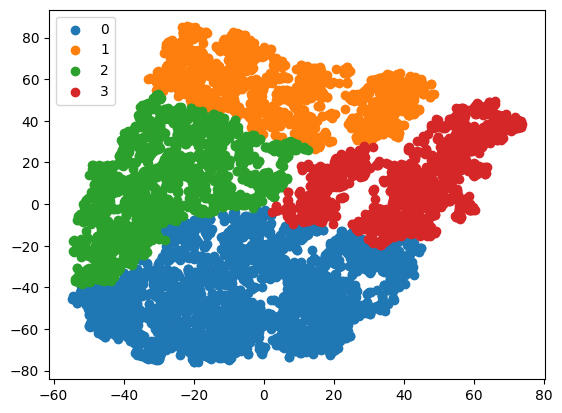

In [98]:
X = model.wv.vectors
X_transforme = TSNE().fit_transform(X)

clust_hierarchique = AgglomerativeClustering(n_clusters=4, linkage='ward')
label = clust_hierarchique.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

In [99]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [100]:
nmi

0.09549049443793127

In [101]:
ari

0.07650153578934064

Chaque critère donne un mauvais clustering mais le meilleur critère est complete

#####UMAP

On fait une reduction de dimension de type UMAP avant le clustering hierarchique

De même si on met n_clusters=4 l'algorithme trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

On regarde par ailleurs la forme des vrais clusters pour choisir le meilleur critere d'aggregation

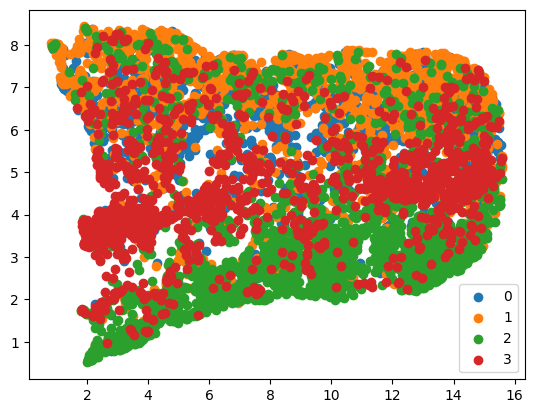

In [102]:
X = model.wv.vectors

label = vocab_labels2
X_transforme = umap.UMAP().fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

Comme les clusters se chevauchent énormément et n'ont pas une forme spherique, les differents critères risquent de pas trover les bons clusters


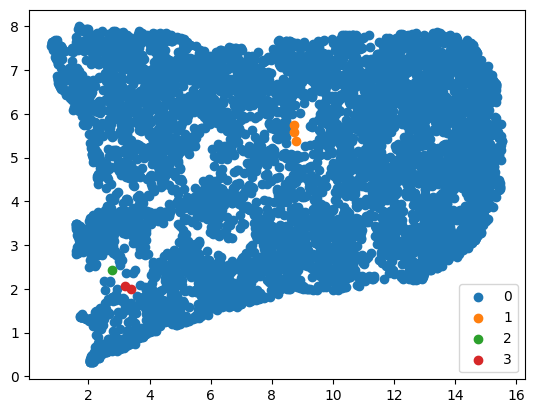

In [103]:
X = model.wv.vectors
X_transforme = umap.UMAP().fit_transform(X)

clust_hierarchique = AgglomerativeClustering(n_clusters=4, linkage='single')
label = clust_hierarchique.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

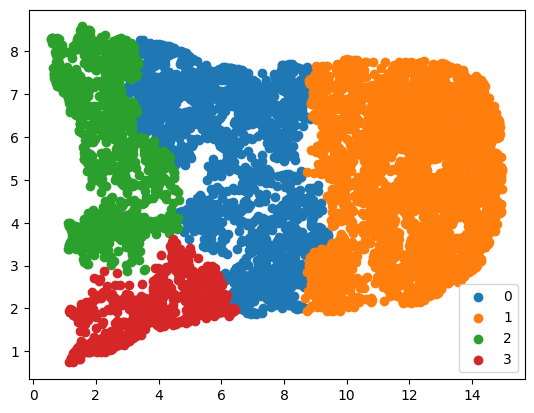

In [104]:
X = model.wv.vectors
X_transforme = umap.UMAP().fit_transform(X)

clust_hierarchique = AgglomerativeClustering(n_clusters=4, linkage='complete')
label = clust_hierarchique.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

In [105]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [106]:
nmi

0.052825951214129405

In [107]:
ari

0.024955549820473617

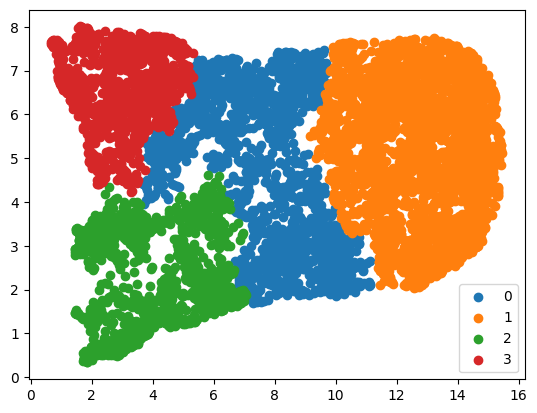

In [108]:
X = model.wv.vectors
X_transforme = umap.UMAP().fit_transform(X)

clust_hierarchique = AgglomerativeClustering(n_clusters=4, linkage='ward')
label = clust_hierarchique.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

In [109]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [110]:
nmi

0.058342514122927486

In [111]:
ari

0.03305981227691605

On voit que chaque critère donne un très mauvais clustering (même le critère de ward), ce qui est confirmé par les métriques

####Nombre de clusters

On utilise la methode du coude, le coefficient de silhouette et le coefficient calinski_harabasz pour estimer le nombre de clusters pour chaque méthode de clustering

#####Kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

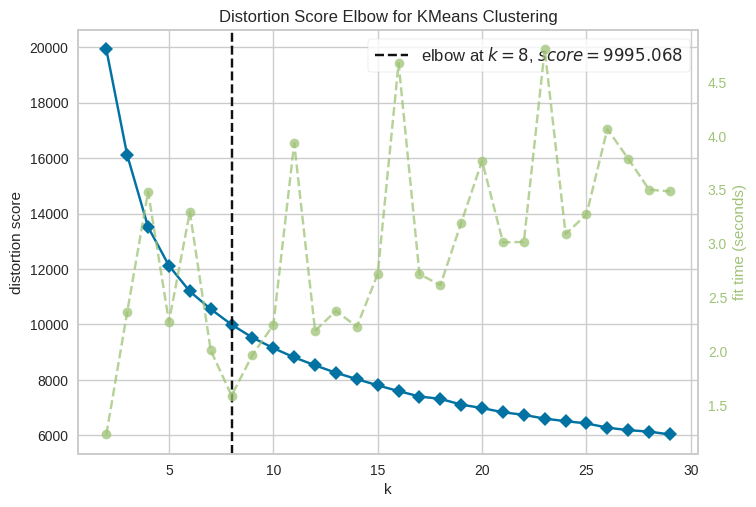

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [112]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

X = model.wv.vectors
km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,30), timings= True)
visualizer.fit(X)
visualizer.show() 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

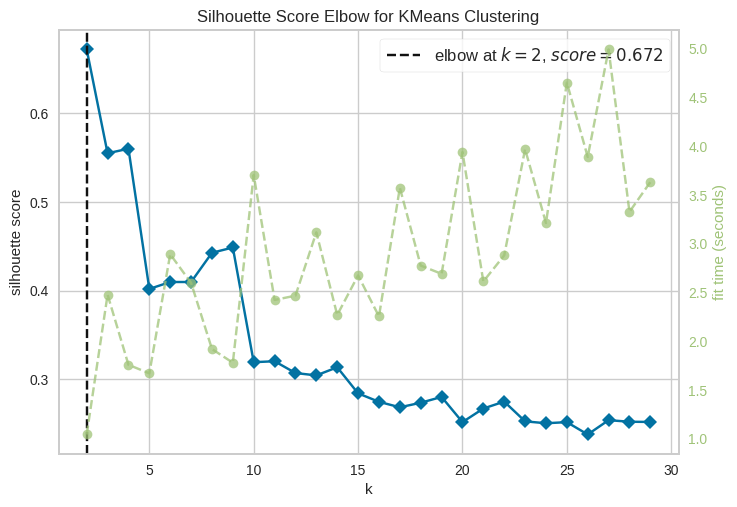

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [113]:
from yellowbrick.cluster import KElbowVisualizer

X = model.wv.vectors
km = KMeans()

visualizer = KElbowVisualizer(km, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(X)
visualizer.show() 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

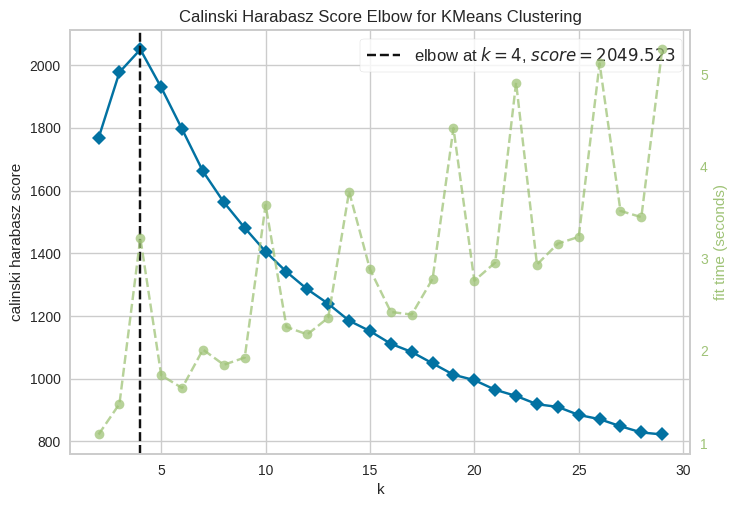

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [114]:
from yellowbrick.cluster import KElbowVisualizer

X = model.wv.vectors
km = KMeans()

visualizer = KElbowVisualizer(km, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(X)
visualizer.show() 

Pour Kmeans, la méthode du coude donne 8 clusters, le coefficient Silhouette donne 2 clusters et le coefficient Calinski Harabasz donne 4 clusters

#####Kmedoids

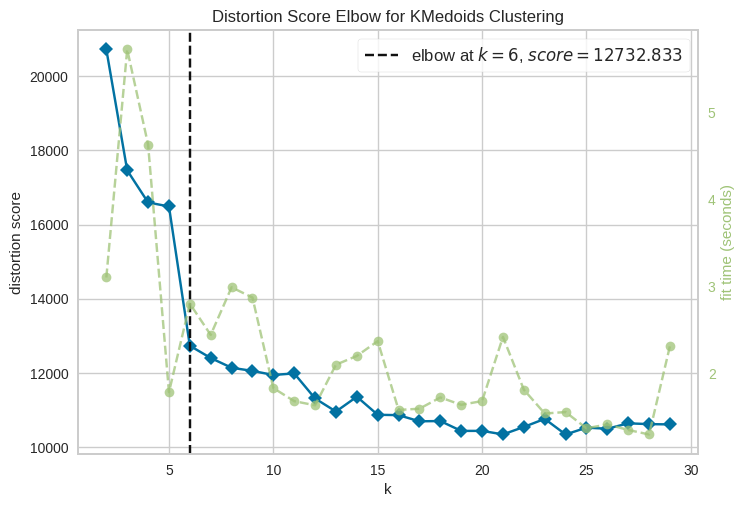

<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [115]:
from yellowbrick.cluster import KElbowVisualizer

X = model.wv.vectors
km = KMedoids()

visualizer = KElbowVisualizer(km, k=(2,30), timings= True)
visualizer.fit(X)
visualizer.show() 

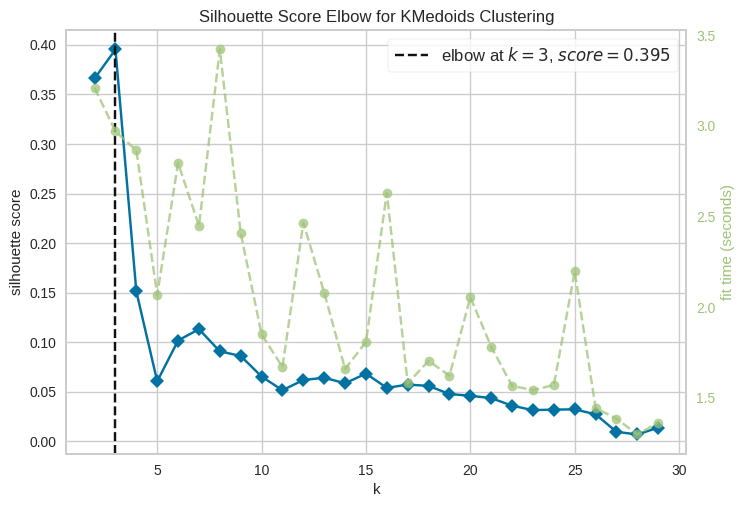

<Axes: title={'center': 'Silhouette Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='silhouette score'>

In [116]:
from yellowbrick.cluster import KElbowVisualizer

X = model.wv.vectors
km = KMedoids()

visualizer = KElbowVisualizer(km, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(X)
visualizer.show() 

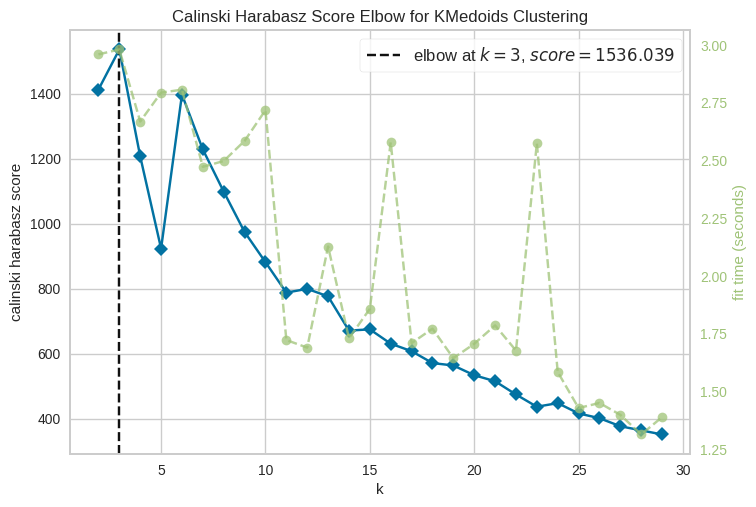

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [117]:
from yellowbrick.cluster import KElbowVisualizer


X = model.wv.vectors
km = KMedoids()

visualizer = KElbowVisualizer(km, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(X)
visualizer.show() 

Pour Kmedoids, la méthode du coude donne 6 clusters, le coefficient Silhouette donne 3 clusters et le coefficient Calinski Harabasz donne aussi 3 clusters

#####Spherical Kmeans

La méthode KElbowVisualizer du package yellowbrick.cluster ne permet pas d'obtenir les coefficients pour un modèle de type Spherical Kmeans

In [118]:
from yellowbrick.cluster import KElbowVisualizer
from coclust.clustering import SphericalKmeans

X = model.wv.vectors
spherical = SphericalKmeans()

visualizer = KElbowVisualizer(spherical, k=(2,30), timings= True)
visualizer.fit(X)
visualizer.show() 

YellowbrickTypeError: ignored

#####Clustering hierarchique

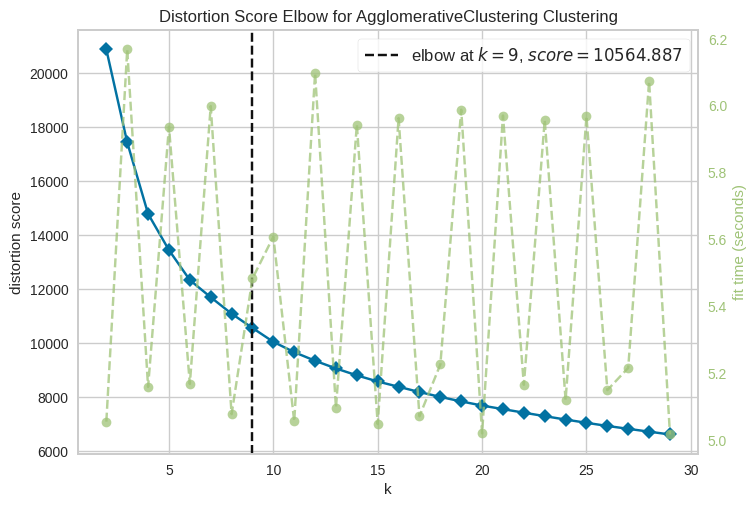

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [119]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

X = model.wv.vectors
clust_hier = AgglomerativeClustering()

visualizer = KElbowVisualizer(clust_hier, k=(2,30), timings= True)
visualizer.fit(X)
visualizer.show()

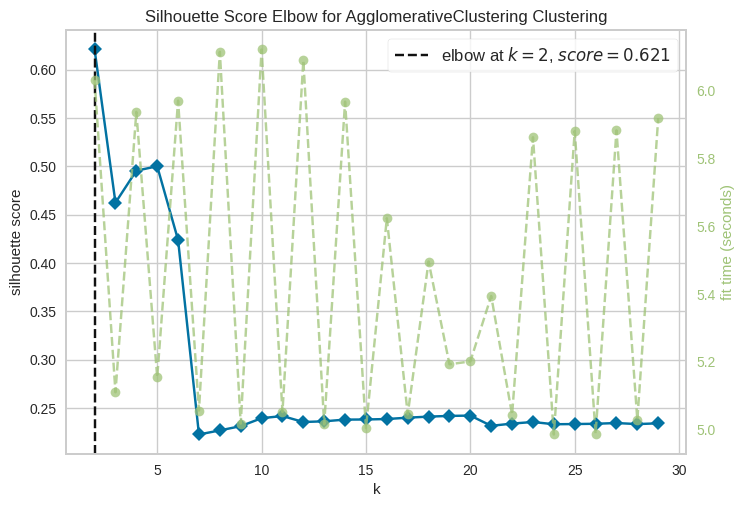

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [120]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

X = model.wv.vectors
clust_hier = AgglomerativeClustering()

visualizer = KElbowVisualizer(clust_hier, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(X)
visualizer.show()

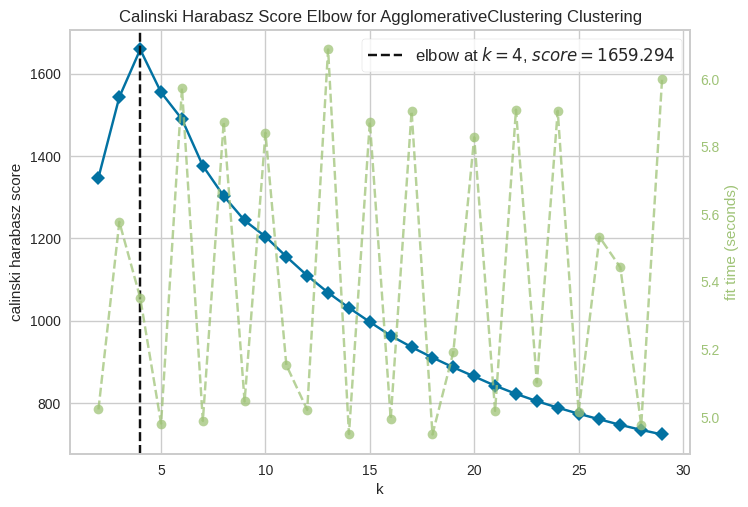

<Axes: title={'center': 'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [121]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

X = model.wv.vectors
clust_hier = AgglomerativeClustering()

visualizer = KElbowVisualizer(clust_hier, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(X)
visualizer.show()

Pour le clustering hierarchique, la méthode du coude donne 9 clusters, le coefficient Silhouette donne 2 clusters et le coefficient Calinski Harabasz donne aussi 4 clusters

#####Remarque

Pour chaque type de clustering, la méthode du coude donne un grand nombre de clusters (8, 6 et 9), et le coefficient silhouette et calinski harabasz donnent 2 à 4 clusters

On teste pour voir si en utilisant ces nombres de clusters on améliore le clustering

Pour Kmeans :

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


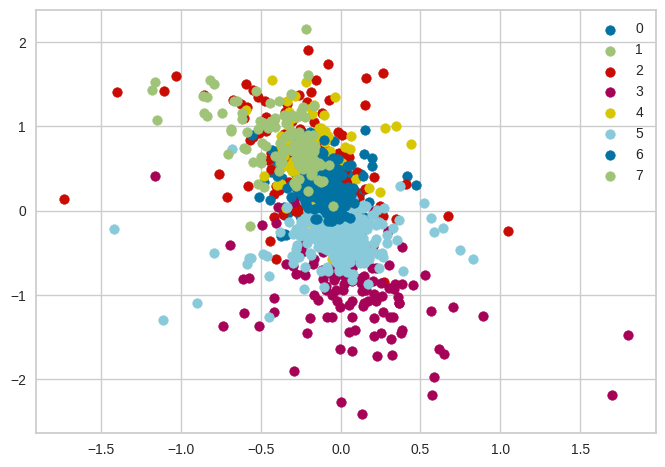

In [122]:
from sklearn.cluster import KMeans

X = model.wv.vectors

kmeans = KMeans(n_clusters=8)
label = kmeans.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [123]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score

nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [124]:
nmi

0.098430926731137

In [125]:
ari

0.02721546397596319

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


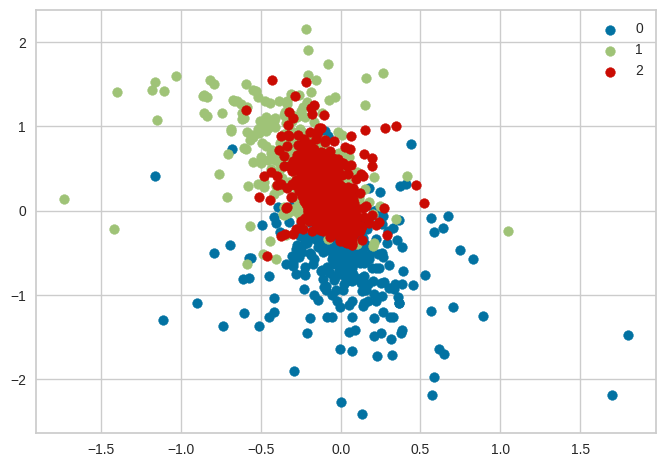

In [126]:
from sklearn.cluster import KMeans

X = model.wv.vectors

kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [127]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [128]:
nmi

0.05985498326961553

In [129]:
ari

0.023950810053429087

Pour Kmedoids :

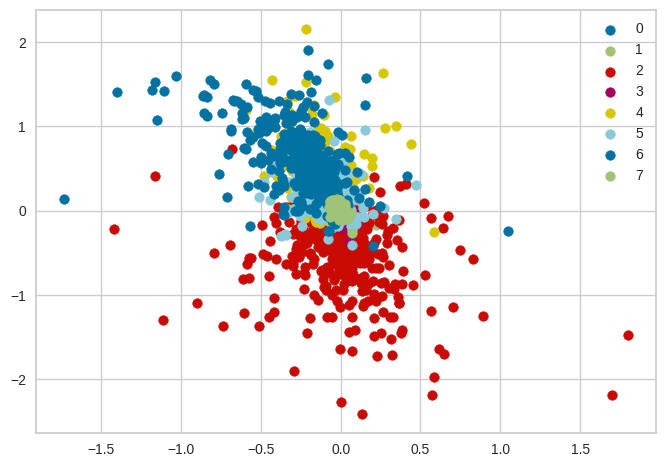

In [130]:
from sklearn_extra.cluster import KMedoids

X = model.wv.vectors

kmedoids = KMedoids(n_clusters=8)
label = kmedoids.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [131]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [132]:
nmi

0.11486650017888203

In [133]:
ari

0.07424658255969796

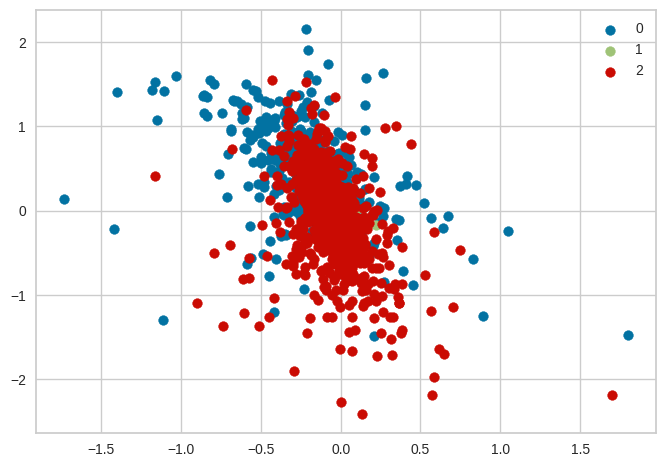

In [134]:
from sklearn_extra.cluster import KMedoids

X = model.wv.vectors

kmedoids = KMedoids(n_clusters=3)
label = kmedoids.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [135]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [136]:
nmi

0.06973776949465885

In [137]:
ari

0.038684347296749466

Pour Spherical Kmeans :

 == New init == 
iteration: 0
6474.20982572586
iteration: 1
7026.604616131737
iteration: 2
7058.101045335112
iteration: 3
7068.685707369235
iteration: 4
7071.580201404689
iteration: 5
7072.541588809859
iteration: 6
7073.061874814173
iteration: 7
7073.345828977668
iteration: 8
7073.548921302159
iteration: 9
7073.739106415595
iteration: 10
7073.882797258666
iteration: 11
7074.01312374589
iteration: 12
7074.122656022267
iteration: 13
7074.218216683226
iteration: 14
7074.322177266418
iteration: 15
7074.450585522391
iteration: 16
7074.60578472578
iteration: 17
7074.745708085098
iteration: 18
7074.846111017152
iteration: 19
7074.91526251719


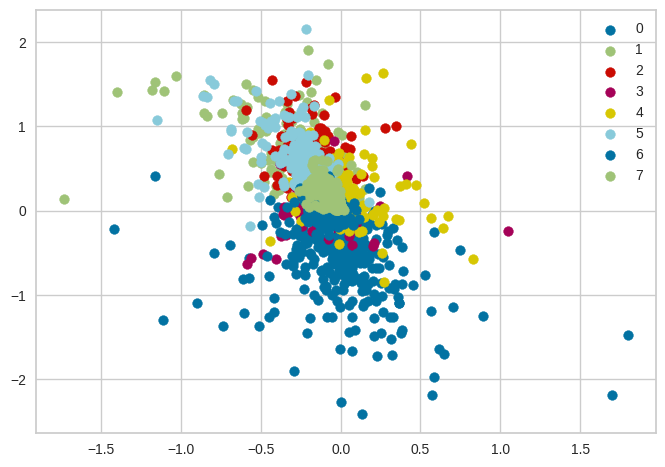

In [138]:
from coclust.clustering import SphericalKmeans

X = model.wv.vectors

skmeans = SphericalKmeans(n_clusters=8)
skmeans.fit(X)
label = skmeans.labels_

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [139]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [140]:
nmi

0.23351469215434398

In [141]:
ari

0.18963956983497499

 == New init == 
iteration: 0
6445.929761475723
iteration: 1
6863.477864780021
iteration: 2
6890.213632186461
iteration: 3
6899.122919659547
iteration: 4
6902.151233001836
iteration: 5
6903.2198810082555
iteration: 6
6903.583199903071
iteration: 7
6903.755829493521
iteration: 8
6903.803355434811
iteration: 9
6903.810857664228
iteration: 10
6903.816818309333
iteration: 11
6903.821698672909
iteration: 12
6903.823270883472
iteration: 13
6903.824140642471
iteration: 14
6903.824534113246
iteration: 15
6903.824742689729
iteration: 16
6903.824911941716
iteration: 17


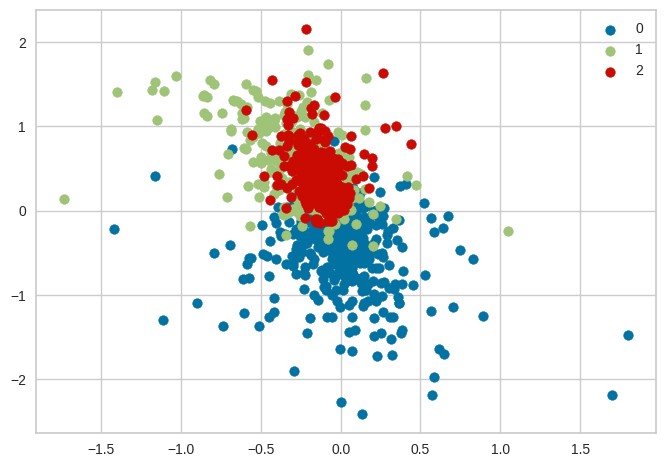

In [142]:
from coclust.clustering import SphericalKmeans

X = model.wv.vectors

skmeans = SphericalKmeans(n_clusters=3)
skmeans.fit(X)
label = skmeans.labels_

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [143]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [144]:
nmi

0.26666859220681444

In [145]:
ari

0.2778207621181488

Pour le clustering hierarchique:

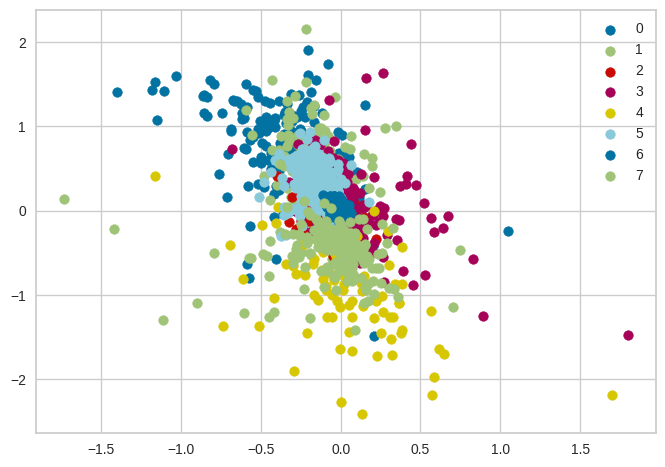

In [146]:
from sklearn.cluster import AgglomerativeClustering

X = model.wv.vectors

clust_hierarchique = AgglomerativeClustering(n_clusters=8, linkage='ward')
label = clust_hierarchique.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [147]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [148]:
nmi

0.06632643094016996

In [149]:
ari

0.018410825070090685

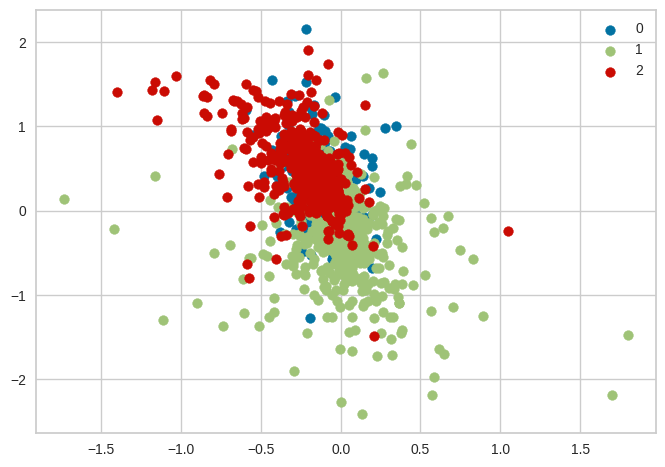

In [150]:
from sklearn.cluster import AgglomerativeClustering

X = model.wv.vectors

clust_hierarchique = AgglomerativeClustering(n_clusters=3, linkage='ward')
label = clust_hierarchique.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [151]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [152]:
nmi

0.060514264162059156

In [153]:
ari

0.03516637743866712

On voit que en prenant 2 et 3 clusters on obtient des resultats pire, alors qu'en prenant 8 clusters on obtient des resultats similaires pour chaque clustering. Cependant les résultats restent quand même mauvais



####Partie 1 : Conclusion 

On a les tableaux récapitulatifs suivants pour 4 clusters:

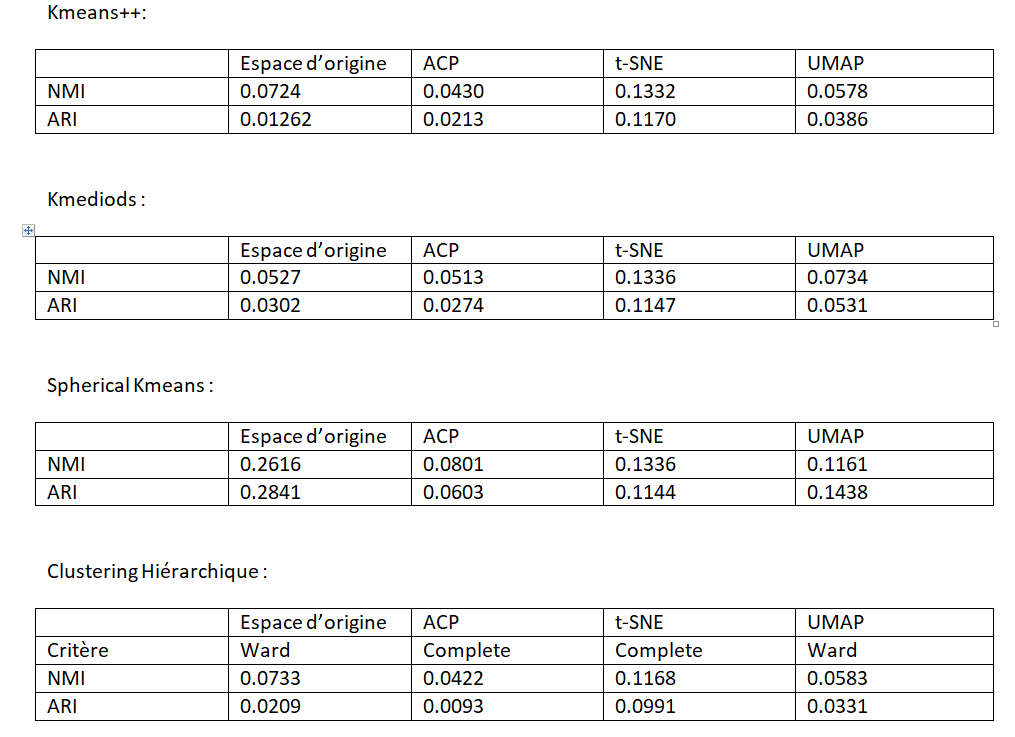

De manière générale les differents clusterings donnent de très mauvais resultats.

Pour Kmeans++, Kmediods et le clustering hierarchique, la réduction de dimension t-SNE donne le meilleur résultat.

Pour Spherical Kmeans l'espace d'origine donne un bien meilleur clustering que les clustering après une réduction de dimension.



La méthode t-SNE semble être la meilleur méthode de réduction de dimension

On peut constater que dans la majorité des clusterings, l'espace d'origine donne de pire résultats qu'après réduction de dimension t-SNE. Donc il semble que la réduction de dimension ameliore le clustering. 

Il semble aussi que la réduction de dimension UMAP donne de pire résultats que les autres réduction de dimensions.

Quant à la meilleur technique de clustering, il semble que spherical Kmeans soit le plus performant comme vu précédement (pour classic3)

###Partie 2: Approche jointe/simultanée


####Reduced Kmeans

Je n'ai pas trouvé d'implementation de reduced k-means en python

####Deep Kmeans

Pour Deep Kmeans je n'arrive pas à installer le package. On a l'erreur ci-dessous qui dit qu'il ne trouve pas de projet python car il manque les fichiers setup.py et pyproject.toml. En effet en regardant le github, on voit que ces fichiers n'existent pas. Par ailleurs il n'y a pas de documentation pour expliquer l'installation

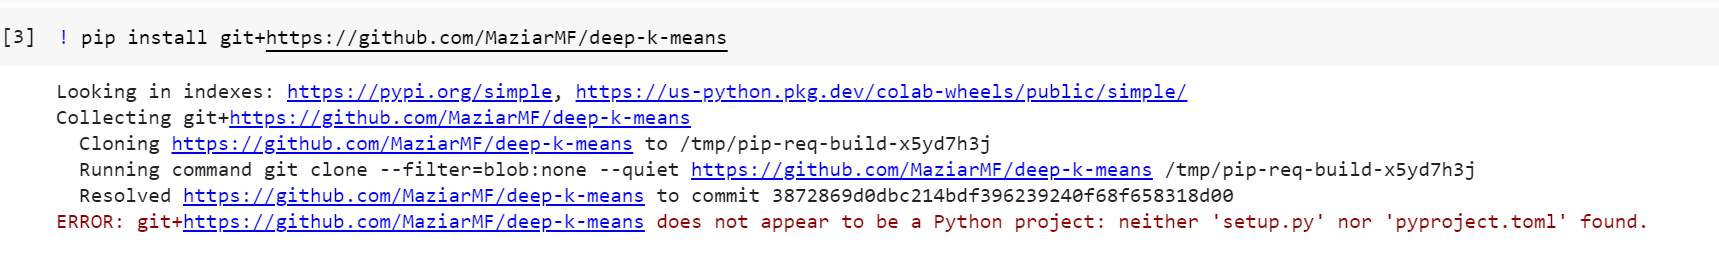

In [ ]:
! pip install git+https://github.com/MaziarMF/deep-k-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/MaziarMF/deep-k-means to /tmp/pip-req-build-yv4f2452
  Running command git clone --filter=blob:none --quiet https://github.com/MaziarMF/deep-k-means /tmp/pip-req-build-yv4f2452
  Resolved https://github.com/MaziarMF/deep-k-means to commit 3872869d0dbc214bdf396239240f68f658318d00
ERROR: git+https://github.com/MaziarMF/deep-k-means does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
